<a href="https://colab.research.google.com/github/HopeRetina/image_related/blob/main/SVD_image_compression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Using singular value decomposition to compress image data and approximate images with lower ranks.

In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os
plt.rcParams['figure.figsize'] = [16, 8]

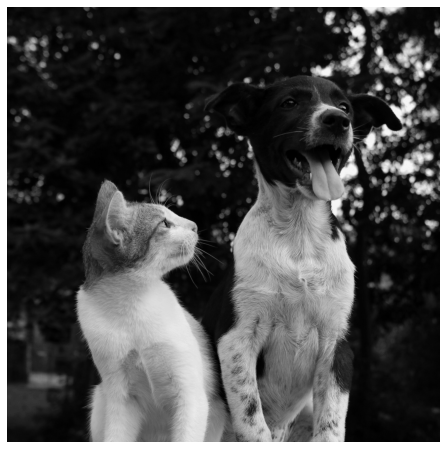

In [2]:
A = imread('cute.jpeg')
X = np.mean(A, -1) # Convert RGB to grayscale

img = plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')
plt.show()

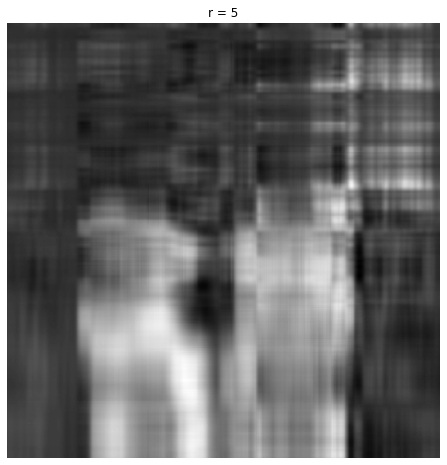

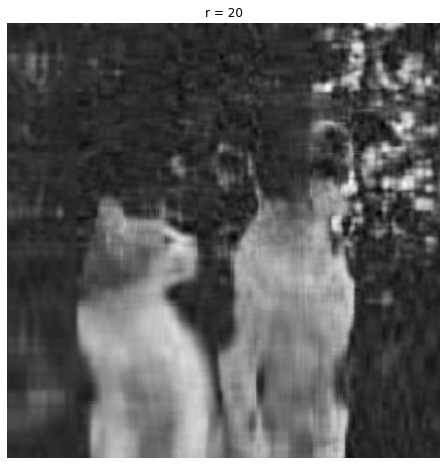

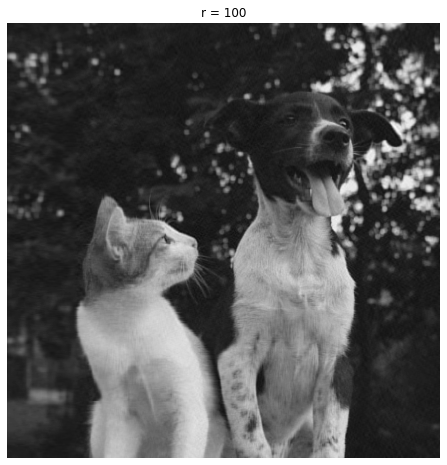

In [3]:
U, S, VT = np.linalg.svd(X, full_matrices=False) # Ecomic SVD
S = np.diag(S)

# Construct low-rank approximation of the photo
j = 0
for r in (5, 20, 100):
  Xapprox = U[:, :r] @ S[0:r, :r] @ VT[:r, :]
  plt.figure(j + 1)
  j += 1
  img = plt.imshow(Xapprox)
  plt.set_cmap('gray')
  plt.axis('off')
  plt.title('r = ' + str(r))
  plt.show()


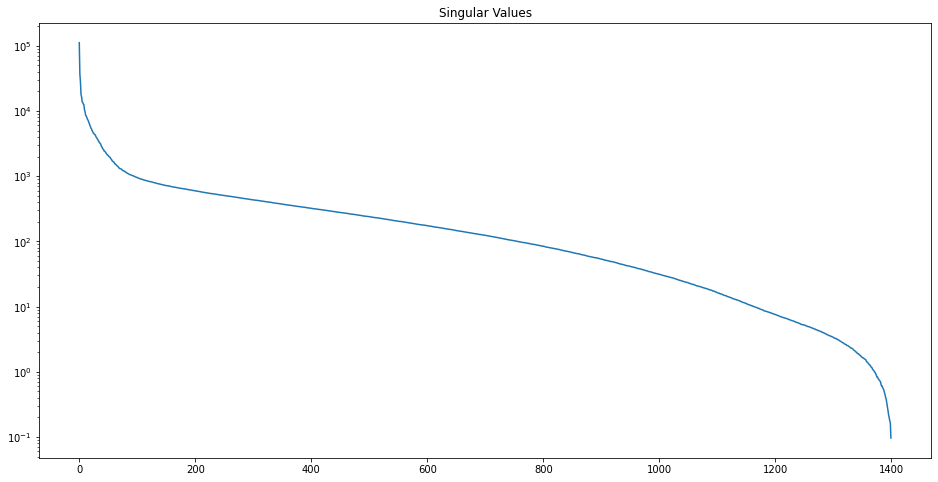

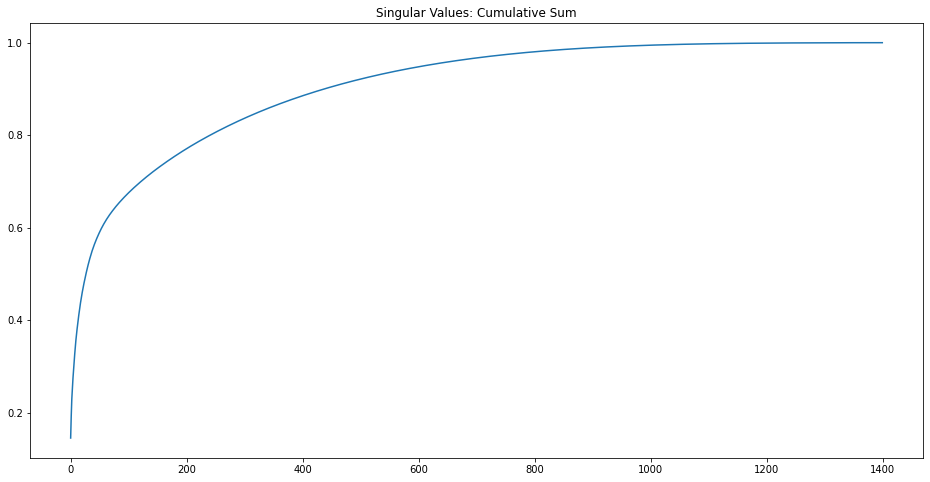

In [4]:
plt.figure(1)
plt.semilogy(np.diag(S))
plt.title('Singular Values')
plt.show()

plt.figure(2)
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.title('Singular Values: Cumulative Sum')
plt.show()